# Week 2: Assignment

Note - I had to download the corpus and read it locally as the anc.org webpage was giving me sporradic errors. And I did not use BeautifulSoup, because my corpus was text only.

## Prep the corpus

In [2]:
import nltk
import time
from nltk.corpus import PlaintextCorpusReader

corpus_root = r"C:\Users\camer\Documents\UCI CE Courses\I&C SCI_X426.77 Text Mining and Analytics for Machine Learning\Module 2\OANC-GrAF\data\spoken\telephone\switchboard"
file_pattern = r".*/.*\.txt"

switchboard = PlaintextCorpusReader(corpus_root, file_pattern)

## Define the process to index and count statistics

In [6]:
def describe_pcr(pcr):
    """
    Receives a PlaintextCorpusReader object and performs indexing and creates summary statistics
    """

    started = time.time()
    
    counts = nltk.FreqDist()
    tokens = nltk.FreqDist()

    for para in pcr.paras():
        counts['paras'] += 1

        for sent in para:
            counts['sents'] += 1

            for word in sent:
                counts['words'] += 1
                tokens[word] += 1
    
    n_fileids = len(pcr.fileids())
    
    return {
        'files': n_fileids,
        'paras': counts['paras'],
        'sents': counts['sents'],
        'words': counts['words'],
        'vocab': len(tokens),
        'lexdiv': float(counts['words']) / float(len(tokens)),
        'ppdoc': float(counts['paras']) / float(n_fileids),
        'sppar': float(counts['sents']) / float(counts['paras']),
        'secs': time.time() - started,
    }, counts, tokens

## Run the process

In [7]:
stats, fd_counts, fd_tokens = describe_pcr(switchboard)
stats

{'files': 2307,
 'paras': 165630,
 'sents': 165630,
 'words': 3264745,
 'vocab': 28418,
 'lexdiv': 114.88299669223731,
 'ppdoc': 71.79453836150846,
 'sppar': 1.0,
 'secs': 33.49644732475281}

## Results

{'files': 2307,
 'paras': 165630,
 'sents': 165630,
 'words': 3264745,
 'vocab': 28418,
 'lexdiv': 114.88299669223731,
 'ppdoc': 71.79453836150846,
 'sppar': 1.0,
 'secs': 33.49644732475281}

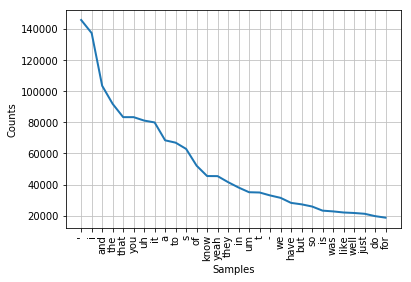

In [15]:
fd_tokens.plot(30)

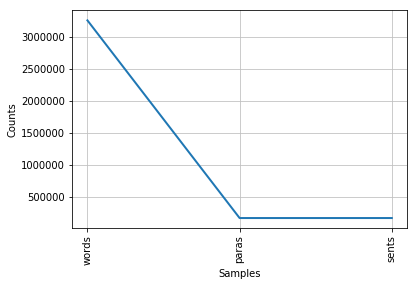

In [16]:
fd_counts.plot(30)